<a href="https://colab.research.google.com/github/Tatiana-Quilca/CalculadoraApp/blob/master/0.8634_nuevoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Paso 1: Descomprimir el dataset (esto solo se hace una vez)
import os
import zipfile

zip_path = '/content/Balanced.zip'
extract_path = '/content/'

# Solo descomprimir si no se ha hecho antes
if not os.path.exists(os.path.join(extract_path, 'Balanced')):
    print(f"Descomprimiendo {zip_path}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("¡Descompresión completada!")
else:
    print("La carpeta 'Balanced' ya existe. Omitiendo descompresión.")

Descomprimiendo /content/Balanced.zip...
¡Descompresión completada!


Creando datasets...
Found 1680 training images and 1680 training masks
Found 210 validation images and 210 validation masks
Entrenando modelo...
82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "EfficientWeedDetectionModel"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ EfficientNetV2S_Ba… │ [(None, 64, 64,   │ 20,331,360 │ input_layer[0][0] │
│ (Functional)        │ 24), (None, 32,   │            │                   │
│                     │ 32, 96), (None,   │            │                   │
│                     │ 16, 16, 192),     │            │                   │
│                     │ (None, 16, 16,    │            │                   │
│                     │ 256), (None, 4,   │            │                   │
│                     │ 4, 1280)]         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aspp_module         │ (None, 4, 4, 192) │  7,315,968 │ EfficientNetV2S_… │
│ (ASPPModule)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deformable_attenti… │ (None, 4, 4, 192) │     76,992 │ aspp_module[0][0] │
│ (DeformableAttenti… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 8, 8, 96)  │     73,728 │ deformable_atten… │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 8, 8, 256) │          0 │ EfficientNetV2S_… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 96)  │        384 │ conv2d_transpose… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 8, 8, 96)  │     24,576 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_7 (ReLU)      │ (None, 8, 8, 96)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 96)  │        384 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 8, 8, 96)  │          0 │ re_lu_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_8 (ReLU)      │ (None, 8, 8, 96)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 8, 8, 192) │          0 │ dropout_1[0][0],  │
│ (Concatenate)       │                   │            │ re_lu_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d    │ (None, 8, 8, 96)  │     20,160 │ concatenate_2[0]… │
│ (SeparableConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 96)  │        384 │ separable_conv2d… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_9 (ReLU)      │ (None, 8, 8, 96)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 8, 8, 96)  │          0 │ re_lu_9[0][0]   

 Total params: 27,957,306 (106.65 MB)

 Trainable params: 27,798,778 (106.04 MB)

 Non-trainable params: 158,528 (619.25 KB)

Starting training for 150 epochs...
Epoch 1/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.1665 - dice_coefficient: 0.0887 - iou_metric: 0.0909 - loss: 2.3408
Epoch 1: val_dice_coefficient improved from -inf to 0.08729, saving model to efficient_weed_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 260s 450ms/step - accuracy: 0.1666 - dice_coefficient: 0.0888 - iou_metric: 0.0910 - loss: 2.3402 - val_accuracy: 0.1895 - val_dice_coefficient: 0.0873 - val_iou_metric: 0.1041 - val_loss: 2.1984 - learning_rate: 1.0000e-04
Epoch 2/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.2612 - dice_coefficient: 0.1017 - iou_metric: 0.1529 - loss: 2.1368
Epoch 2: val_dice_coefficient improved from 0.08729 to 0.09302, saving model to efficient_weed_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 77s 267ms/step - accuracy: 0.2616 - dice_coefficient: 0.1017 - iou_metric: 0.1532 - loss: 2.1362 - val_accuracy: 0.2650 - val_dice_coefficient: 0.0930 - val_iou_metric: 0.1545 - val_loss: 2.0847 - 

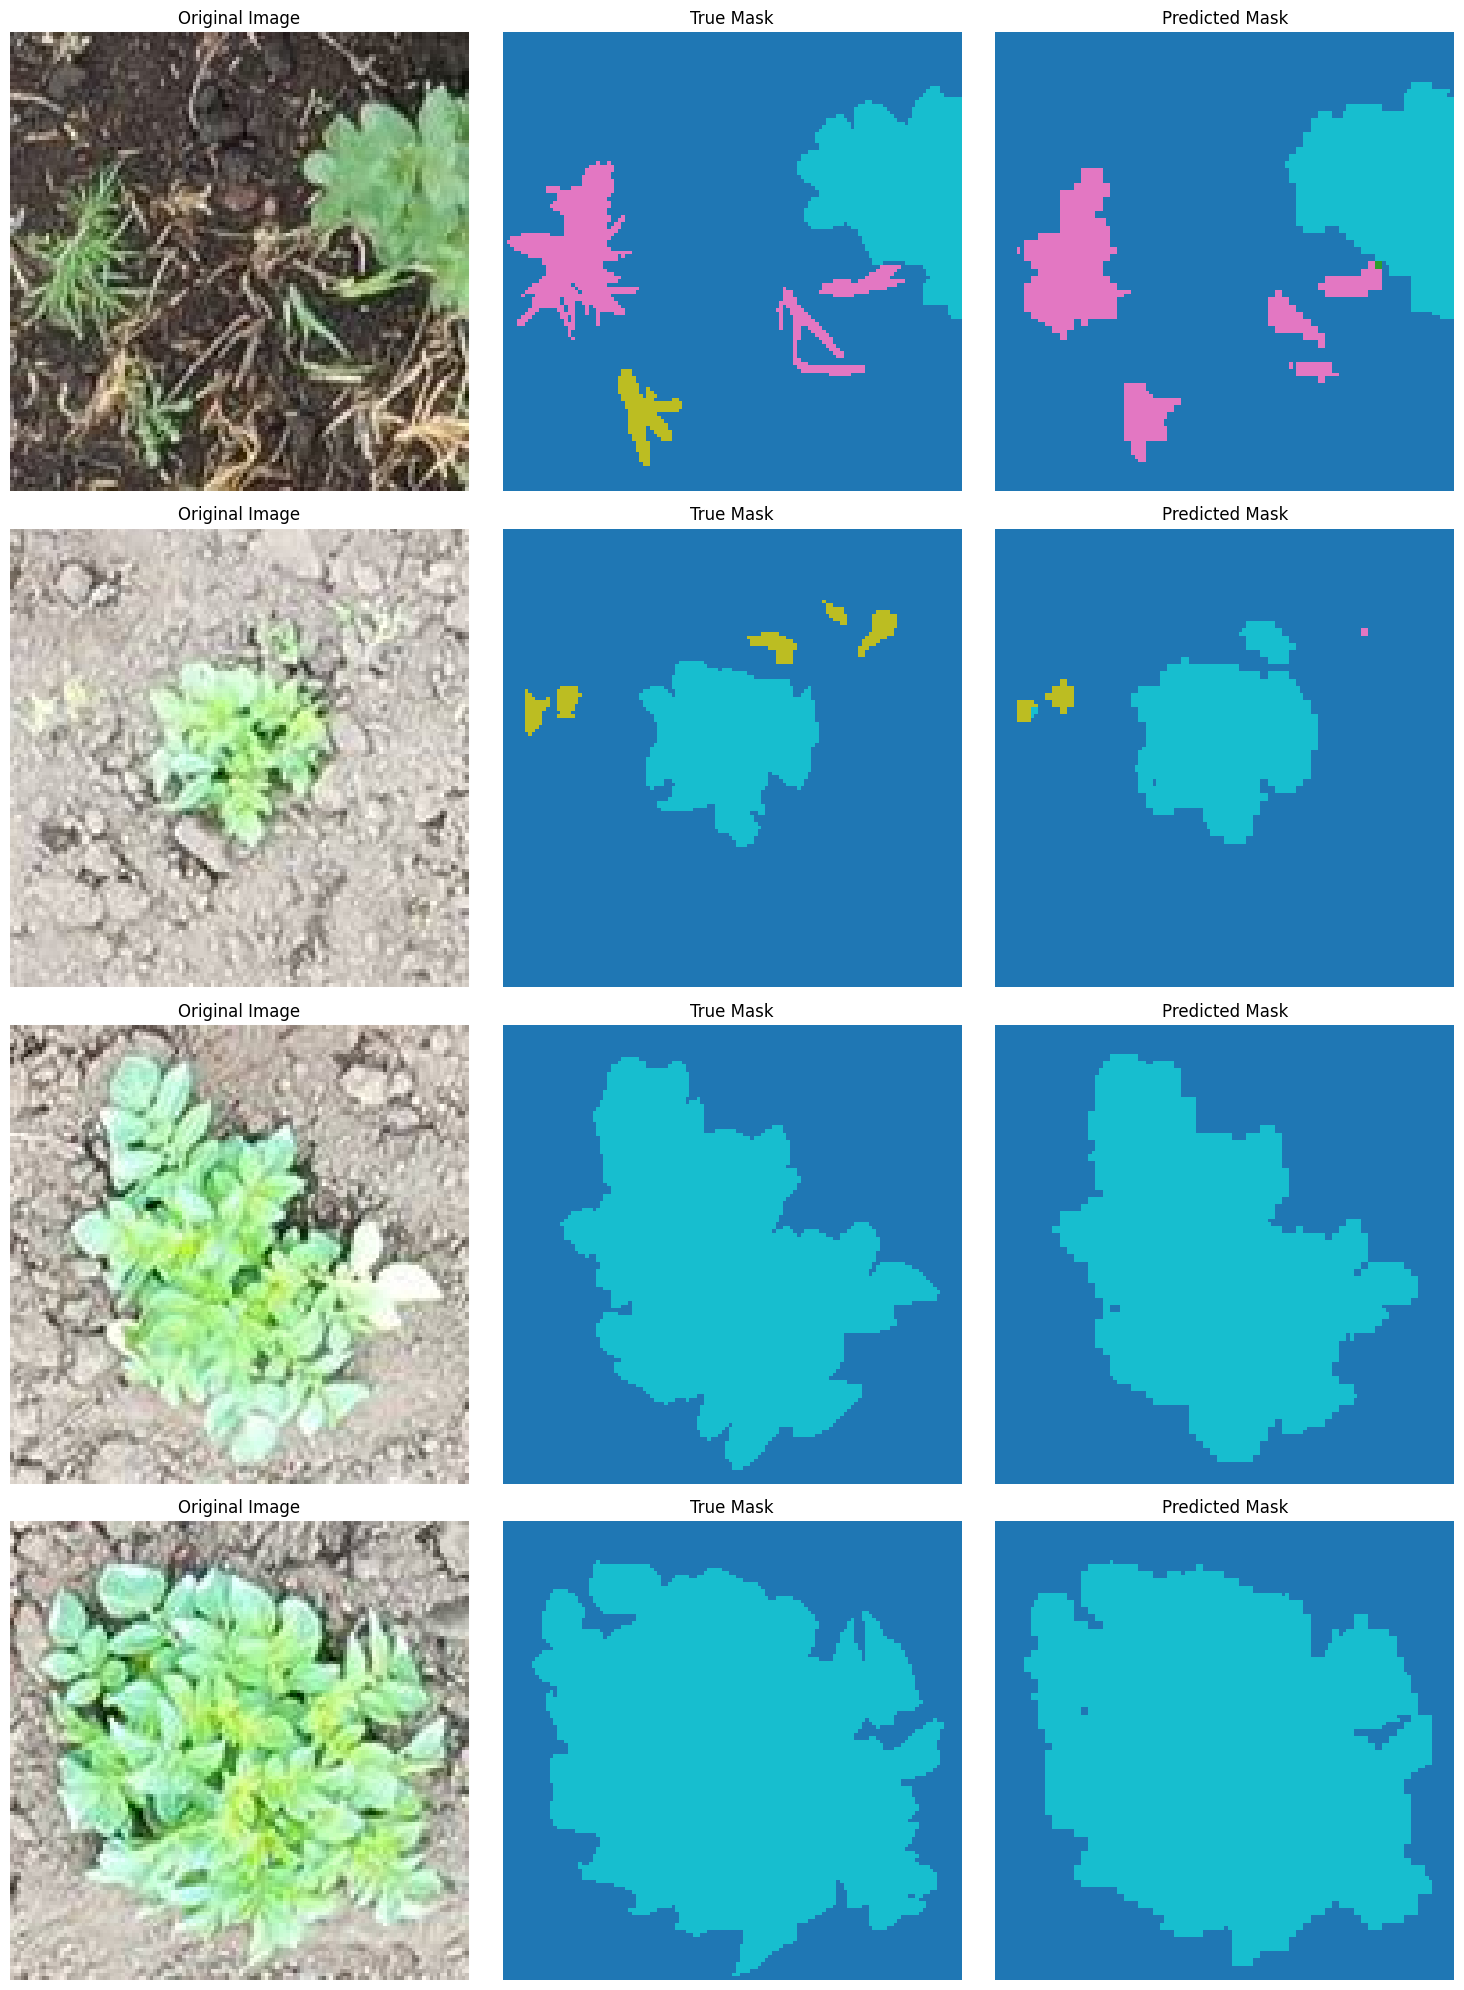

¡Entrenamiento completado! El mejor modelo se guardó como 'efficient_weed_model.keras'


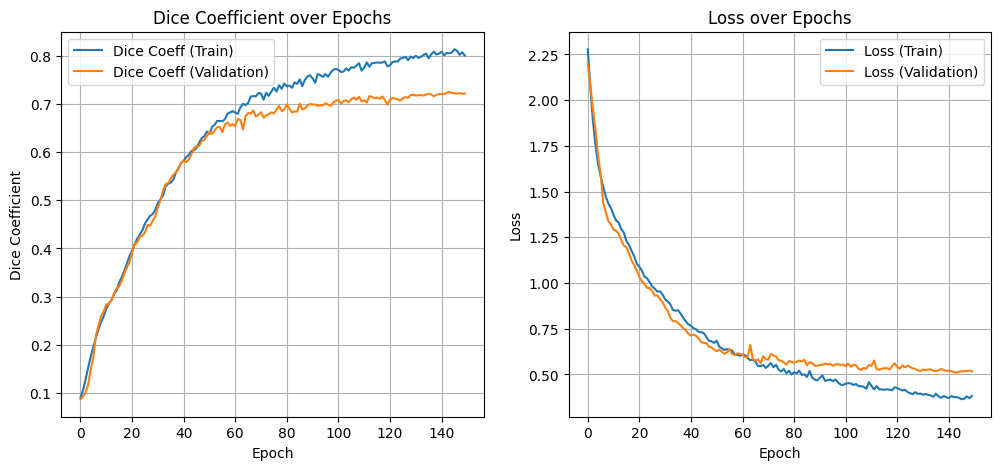


Evaluando el modelo final en el conjunto de validación:
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9606 - dice_coefficient: 0.7212 - iou_metric: 0.9262 - loss: 0.5655
Validation Loss: 0.5103
Validation Dice Coefficient: 0.7247
Validation IoU: 0.9273
Validation Accuracy: 0.9614
Calculando IoU por clase...
IoU for Background: 0.9508
IoU for Cow-tongue: 0.8886
IoU for Dandelion: 0.8973
IoU for Kikuyo: 0.8850
IoU for Other: 0.6798
IoU for Potato: 0.8793


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

# Configuración del modelo
IMG_HEIGHT = 128
IMG_WIDTH = 128
NUM_CLASSES = 6
BATCH_SIZE = 16
EPOCHS = 150
LEARNING_RATE = 1e-4

# Paths
BASE_PATH = './Balanced'
TRAIN_IMAGES_PATH = os.path.join(BASE_PATH, 'train/images')
TRAIN_MASKS_PATH = os.path.join(BASE_PATH, 'train/masks')
VAL_IMAGES_PATH = os.path.join(BASE_PATH, 'val/images')
VAL_MASKS_PATH = os.path.join(BASE_PATH, 'val/masks')

# Módulos del modelo
class ASPPModule(layers.Layer):
    def __init__(self, filters=192, **kwargs):
        super(ASPPModule, self).__init__(**kwargs)
        self.filters = filters
        self.conv_1x1 = layers.Conv2D(filters, 1, padding='same', use_bias=False)
        self.bn_1x1 = layers.BatchNormalization()
        self.relu_1x1 = layers.ReLU()
        self.conv_3x3_6 = layers.Conv2D(filters, 3, padding='same', dilation_rate=6, use_bias=False)
        self.bn_3x3_6 = layers.BatchNormalization()
        self.relu_3x3_6 = layers.ReLU()
        self.conv_3x3_12 = layers.Conv2D(filters, 3, padding='same', dilation_rate=12, use_bias=False)
        self.bn_3x3_12 = layers.BatchNormalization()
        self.relu_3x3_12 = layers.ReLU()
        self.conv_3x3_18 = layers.Conv2D(filters, 3, padding='same', dilation_rate=18, use_bias=False)
        self.bn_3x3_18 = layers.BatchNormalization()
        self.relu_3x3_18 = layers.ReLU()
        self.global_avg_pool = layers.GlobalAveragePooling2D(keepdims=True)
        self.conv_1x1_gap = layers.Conv2D(filters, 1, padding='same', use_bias=False)
        self.bn_1x1_gap = layers.BatchNormalization()
        self.relu_1x1_gap = layers.ReLU()
        self.conv_final = layers.Conv2D(filters, 1, padding='same', use_bias=False)
        self.bn_final = layers.BatchNormalization()
        self.relu_final = layers.ReLU()
        self.dropout = layers.Dropout(0.2)

    def call(self, inputs, training=None):
        input_shape = tf.shape(inputs)
        conv_1x1 = self.relu_1x1(self.bn_1x1(self.conv_1x1(inputs), training=training))
        conv_3x3_6 = self.relu_3x3_6(self.bn_3x3_6(self.conv_3x3_6(inputs), training=training))
        conv_3x3_12 = self.relu_3x3_12(self.bn_3x3_12(self.conv_3x3_12(inputs), training=training))
        conv_3x3_18 = self.relu_3x3_18(self.bn_3x3_18(self.conv_3x3_18(inputs), training=training))
        gap = self.global_avg_pool(inputs)
        gap = self.relu_1x1_gap(self.bn_1x1_gap(self.conv_1x1_gap(gap), training=training))
        gap = tf.image.resize(gap, [input_shape[1], input_shape[2]], method='bilinear')
        concat = layers.Concatenate()([conv_1x1, conv_3x3_6, conv_3x3_12, conv_3x3_18, gap])
        output = self.relu_final(self.bn_final(self.conv_final(concat), training=training))
        output = self.dropout(output, training=training)
        return output

class DeformableAttention(layers.Layer):
    def __init__(self, filters, **kwargs):
        super(DeformableAttention, self).__init__(**kwargs)
        self.filters = filters

    def build(self, input_shape):
        self.attention_conv = layers.Conv2D(self.filters, 1, padding='same', activation='sigmoid', name='attention_weights_conv', use_bias=False)
        self.bn_attention = layers.BatchNormalization()
        self.feature_conv = layers.SeparableConv2D(self.filters, 3, padding='same', name='feature_processing_conv', use_bias=False)
        self.bn_feature = layers.BatchNormalization()
        self.relu_feature = layers.ReLU()
        super(DeformableAttention, self).build(input_shape)

    def call(self, inputs, training=None):
        attention_weights = self.bn_attention(self.attention_conv(inputs), training=training)
        features = self.relu_feature(self.bn_feature(self.feature_conv(inputs), training=training))
        attended_features = features * attention_weights
        return attended_features

def create_efficient_backbone(input_shape):
    base_model = tf.keras.applications.EfficientNetV2S(
        input_shape=input_shape,
        weights='imagenet',
        include_top=False
    )
    base_model.trainable = True
    layer_names = [
        'block1a_project_activation',
        'block2a_expand_activation',
        'block3a_expand_activation',
        'block4a_expand_activation',
        'top_activation'
    ]
    outputs = [base_model.get_layer(name).output for name in layer_names]
    return Model(inputs=base_model.input, outputs=outputs, name='EfficientNetV2S_Backbone')

def create_weed_detection_model(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), num_classes=NUM_CLASSES):
    inputs = layers.Input(shape=input_shape)
    backbone = create_efficient_backbone(input_shape)
    feat1_out, feat2_out, feat3_out, feat4_out, feat5_out = backbone(inputs)

    deep_features = feat5_out
    aspp_filters = 192
    aspp_features = ASPPModule(filters=aspp_filters)(deep_features)
    attended_features = DeformableAttention(filters=aspp_filters)(aspp_features)

    # Decoder Path
    decoder_up1 = layers.Conv2DTranspose(96, 2, strides=2, padding='same', use_bias=False)(attended_features)
    decoder_up1 = layers.BatchNormalization()(decoder_up1)
    decoder_up1 = layers.ReLU()(decoder_up1)
    decoder_up1 = layers.Dropout(0.2)(decoder_up1)

    feat4_downsampled = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same')(feat4_out)
    feat4_processed = layers.Conv2D(96, 1, padding='same', use_bias=False)(feat4_downsampled)
    feat4_processed = layers.BatchNormalization()(feat4_processed)
    feat4_processed = layers.ReLU()(feat4_processed)

    decoder_concat_8x8 = layers.Concatenate()([decoder_up1, feat4_processed])
    decoder_conv_8x8 = layers.SeparableConv2D(96, 3, padding='same', use_bias=False)(decoder_concat_8x8)
    decoder_conv_8x8 = layers.BatchNormalization()(decoder_conv_8x8)
    decoder_conv_8x8 = layers.ReLU()(decoder_conv_8x8)
    decoder_conv_8x8 = layers.Dropout(0.2)(decoder_conv_8x8)

    decoder_up2 = layers.Conv2DTranspose(96, 2, strides=2, padding='same', use_bias=False)(decoder_conv_8x8)
    decoder_up2 = layers.BatchNormalization()(decoder_up2)
    decoder_up2 = layers.ReLU()(decoder_up2)
    decoder_up2 = layers.Dropout(0.2)(decoder_up2)

    feat3_processed = layers.Conv2D(96, 1, padding='same', use_bias=False)(feat3_out)
    feat3_processed = layers.BatchNormalization()(feat3_processed)
    feat3_processed = layers.ReLU()(feat3_processed)

    decoder_concat_16x16 = layers.Concatenate()([decoder_up2, feat3_processed])
    decoder_conv_16x16 = layers.SeparableConv2D(96, 3, padding='same', use_bias=False)(decoder_concat_16x16)
    decoder_conv_16x16 = layers.BatchNormalization()(decoder_conv_16x16)
    decoder_conv_16x16 = layers.ReLU()(decoder_conv_16x16)
    decoder_conv_16x16 = layers.Dropout(0.2)(decoder_conv_16x16)

    decoder_up3 = layers.Conv2DTranspose(48, 2, strides=2, padding='same', use_bias=False)(decoder_conv_16x16)
    decoder_up3 = layers.BatchNormalization()(decoder_up3)
    decoder_up3 = layers.ReLU()(decoder_up3)
    decoder_up3 = layers.Dropout(0.2)(decoder_up3)

    feat2_processed = layers.Conv2D(48, 1, padding='same', use_bias=False)(feat2_out)
    feat2_processed = layers.BatchNormalization()(feat2_processed)
    feat2_processed = layers.ReLU()(feat2_processed)

    decoder_concat_32x32 = layers.Concatenate()([decoder_up3, feat2_processed])
    decoder_conv_32x32 = layers.SeparableConv2D(48, 3, padding='same', use_bias=False)(decoder_concat_32x32)
    decoder_conv_32x32 = layers.BatchNormalization()(decoder_conv_32x32)
    decoder_conv_32x32 = layers.ReLU()(decoder_conv_32x32)
    decoder_conv_32x32 = layers.Dropout(0.2)(decoder_conv_32x32)

    decoder_up4 = layers.Conv2DTranspose(24, 2, strides=2, padding='same', use_bias=False)(decoder_conv_32x32)
    decoder_up4 = layers.BatchNormalization()(decoder_up4)
    decoder_up4 = layers.ReLU()(decoder_up4)
    decoder_up4 = layers.Dropout(0.2)(decoder_up4)

    feat1_processed = layers.Conv2D(24, 1, padding='same', use_bias=False)(feat1_out)
    feat1_processed = layers.BatchNormalization()(feat1_processed)
    feat1_processed = layers.ReLU()(feat1_processed)

    decoder_concat_64x64 = layers.Concatenate()([decoder_up4, feat1_processed])
    decoder_conv_64x64 = layers.SeparableConv2D(24, 3, padding='same', use_bias=False)(decoder_concat_64x64)
    decoder_conv_64x64 = layers.BatchNormalization()(decoder_conv_64x64)
    decoder_conv_64x64 = layers.ReLU()(decoder_conv_64x64)
    decoder_conv_64x64 = layers.Dropout(0.2)(decoder_conv_64x64)

    outputs = layers.Conv2DTranspose(num_classes, 2, strides=2, padding='same', use_bias=False)(decoder_conv_64x64)
    outputs = layers.Conv2D(num_classes, 1, padding='same', activation='softmax', name='segmentation_output')(outputs)

    model = Model(inputs=inputs, outputs=outputs, name='EfficientWeedDetectionModel')
    return model

# Métricas y Funciones de Pérdida
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true_f = tf.reshape(tf.cast(y_true, tf.float32), [-1, NUM_CLASSES])
    y_pred_f = tf.reshape(tf.cast(y_pred, tf.float32), [-1, NUM_CLASSES])
    intersection = tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    dice_scores = (2. * intersection + smooth) / (tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0) + smooth)
    return tf.reduce_mean(dice_scores)

def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred)
        loss = alpha * tf.pow(1 - y_pred, gamma) * cross_entropy
        return loss
    return focal_loss_fixed

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

def combined_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    class_weights = tf.constant([0.4, 4.0, 3.5, 1.0, 2.0, 4.0])
    f_loss_per_pixel_per_class = focal_loss(gamma=2.0, alpha=0.75)(y_true, y_pred)
    weighted_f_loss = f_loss_per_pixel_per_class * class_weights
    f_loss_reduced = tf.reduce_sum(weighted_f_loss, axis=-1)
    f_loss_mean = tf.reduce_mean(f_loss_reduced)
    d_loss = dice_loss(y_true, y_pred)
    return f_loss_mean + (1.5 * d_loss)

def iou_metric(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.one_hot(tf.argmax(y_pred, axis=-1), depth=NUM_CLASSES)
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3]) - intersection
    iou = tf.where(tf.equal(union, 0), 1.0, intersection / union)
    return tf.reduce_mean(iou)

def iou_per_class(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.one_hot(tf.argmax(y_pred, axis=-1), depth=NUM_CLASSES)
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2])
    union = tf.reduce_sum(y_true, axis=[1, 2]) + tf.reduce_sum(y_pred, axis=[1, 2]) - intersection
    iou = tf.where(tf.equal(union, 0), 1.0, intersection / union)
    return tf.reduce_mean(iou, axis=0)

# Carga y Preprocesamiento de Datos
def load_and_preprocess_data(train_img_path, train_msk_path, val_img_path, val_msk_path):
    def load_image_only(image_path):
        image = tf.io.read_file(image_path)
        image = tf.image.decode_image(image, channels=3, expand_animations=False)
        image.set_shape([None, None, 3])
        image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH], method='bilinear')
        return tf.cast(image, tf.float32)

    def load_mask_only(mask_path):
        mask = tf.io.read_file(mask_path)
        mask = tf.image.decode_png(mask, channels=1)
        mask = tf.image.resize(mask, [IMG_HEIGHT, IMG_WIDTH], method='nearest')
        mask = tf.cast(mask, tf.int32)
        mask = tf.squeeze(mask, axis=-1)
        mask = tf.one_hot(mask, NUM_CLASSES)
        return mask

    def augment_and_preprocess(image, mask):
        if tf.random.uniform([]) > 0.5:
            image = tf.image.flip_left_right(image)
            mask = tf.image.flip_left_right(mask)
        if tf.random.uniform([]) > 0.5:
            image = tf.image.flip_up_down(image)
            mask = tf.image.flip_up_down(mask)
        if tf.random.uniform([]) > 0.5:
            k = tf.random.uniform([], minval=1, maxval=4, dtype=tf.int32)
            image = tf.image.rot90(image, k)
            mask = tf.image.rot90(mask, k)
        image = tf.image.random_brightness(image, max_delta=0.4 * 255)
        image = tf.image.random_contrast(image, lower=0.6, upper=1.4)
        image = tf.image.random_hue(image, max_delta=0.15)
        image = tf.image.random_saturation(image, lower=0.6, upper=1.4)
        image = tf.clip_by_value(image, 0.0, 255.0)
        image = tf.keras.applications.efficientnet_v2.preprocess_input(image)
        return image, mask

    train_image_paths = sorted(glob(os.path.join(train_img_path, '*.jpg')))
    train_mask_paths = sorted(glob(os.path.join(train_msk_path, '*.png')))
    val_image_paths = sorted(glob(os.path.join(val_img_path, '*.jpg')))
    val_mask_paths = sorted(glob(os.path.join(val_msk_path, '*.png')))

    if not train_image_paths or not train_mask_paths or not val_image_paths or not val_mask_paths:
        raise FileNotFoundError("Una o más rutas de datos no encontraron archivos. Verifica las rutas.")

    print(f"Found {len(train_image_paths)} training images and {len(train_mask_paths)} training masks")
    print(f"Found {len(val_image_paths)} validation images and {len(val_mask_paths)} validation masks")

    train_image_ds = tf.data.Dataset.from_tensor_slices(train_image_paths).map(load_image_only, num_parallel_calls=tf.data.AUTOTUNE)
    train_mask_ds = tf.data.Dataset.from_tensor_slices(train_mask_paths).map(load_mask_only, num_parallel_calls=tf.data.AUTOTUNE)
    train_dataset = tf.data.Dataset.zip((train_image_ds, train_mask_ds))
    train_dataset = train_dataset.shuffle(buffer_size=1000).map(augment_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    val_image_ds = tf.data.Dataset.from_tensor_slices(val_image_paths).map(load_image_only, num_parallel_calls=tf.data.AUTOTUNE)
    val_mask_ds = tf.data.Dataset.from_tensor_slices(val_mask_paths).map(load_mask_only, num_parallel_calls=tf.data.AUTOTUNE)
    val_dataset = tf.data.Dataset.zip((val_image_ds, val_mask_ds))
    val_dataset = val_dataset.map(lambda img, mask: (tf.keras.applications.efficientnet_v2.preprocess_input(img), mask), num_parallel_calls=tf.data.AUTOTUNE)
    val_dataset = val_dataset.cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    return train_dataset, val_dataset

def train_model(train_dataset, val_dataset, model_save_path='efficient_weed_model.keras'):
    model = create_weed_detection_model()
    model.summary()

    optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE, weight_decay=1e-5)
    model.compile(
        optimizer=optimizer,
        loss=combined_loss,
        metrics=[dice_coefficient, iou_metric, 'accuracy']
    )

    callbacks = [
        tf.keras.callbacks.ModelCheckpoint(
            model_save_path, monitor='val_dice_coefficient', save_best_only=True, mode='max', verbose=1
        ),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_dice_coefficient', patience=50, mode='max', restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.3, patience=20, min_lr=1e-7, verbose=1
        ),
    ]

    print(f"Starting training for {EPOCHS} epochs...")
    history = model.fit(
        train_dataset,
        epochs=EPOCHS,
        validation_data=val_dataset,
        callbacks=callbacks,
        verbose=1
    )
    return model, history

def visualize_predictions(model, val_dataset, num_samples=4):
    print(f"Visualizing {num_samples} samples from the validation set...")
    for images, masks in val_dataset.take(1):
        predictions = model.predict(images)
        fig, axes = plt.subplots(num_samples, 3, figsize=(15, 5 * num_samples))
        for i in range(min(num_samples, images.shape[0])):
            original_image = images[i]
            original_image = (original_image - original_image.numpy().min()) / (original_image.numpy().max() - original_image.numpy().min()) * 255
            original_image = tf.cast(original_image, tf.uint8)
            axes[i, 0].imshow(original_image)
            axes[i, 0].set_title('Original Image')
            axes[i, 0].axis('off')
            true_mask = np.argmax(masks[i].numpy(), axis=-1)
            axes[i, 1].imshow(true_mask, cmap='tab10', vmin=0, vmax=NUM_CLASSES - 1)
            axes[i, 1].set_title('True Mask')
            axes[i, 1].axis('off')
            pred_mask = np.argmax(predictions[i], axis=-1)
            axes[i, 2].imshow(pred_mask, cmap='tab10', vmin=0, vmax=NUM_CLASSES - 1)
            axes[i, 2].set_title('Predicted Mask')
            axes[i, 2].axis('off')
        plt.tight_layout()
        plt.show()
        break

if __name__ == "__main__":
    for path in [TRAIN_IMAGES_PATH, TRAIN_MASKS_PATH, VAL_IMAGES_PATH, VAL_MASKS_PATH]:
        if not os.path.exists(path):
            print(f"Error: La ruta de datos NO existe: {path}")
            print(f"Creando directorio: {path}")
            os.makedirs(path, exist_ok=True)

    print("Creando datasets...")
    train_ds, val_ds = load_and_preprocess_data(TRAIN_IMAGES_PATH, TRAIN_MASKS_PATH, VAL_IMAGES_PATH, VAL_MASKS_PATH)

    if not any(True for _ in train_ds.take(1)):
        print("Error: El dataset de entrenamiento está vacío. Asegúrate de que haya imágenes y máscaras en las rutas correctas.")
        exit()

    print("Entrenando modelo...")
    model_save_path = 'efficient_weed_model.keras'
    model, history = train_model(train_ds, val_ds, model_save_path=model_save_path)

    print("Visualizando predicciones...")
    visualize_predictions(model, val_ds)

    print(f"¡Entrenamiento completado! El mejor modelo se guardó como '{model_save_path}'")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['dice_coefficient'], label='Dice Coeff (Train)')
    plt.plot(history.history['val_dice_coefficient'], label='Dice Coeff (Validation)')
    plt.title('Dice Coefficient over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Dice Coefficient')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss (Train)')
    plt.plot(history.history['val_loss'], label='Loss (Validation)')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\nEvaluando el modelo final en el conjunto de validación:")
    final_metrics = model.evaluate(val_ds)
    print(f"Validation Loss: {final_metrics[0]:.4f}")
    print(f"Validation Dice Coefficient: {final_metrics[1]:.4f}")
    print(f"Validation IoU: {final_metrics[2]:.4f}")
    print(f"Validation Accuracy: {final_metrics[3]:.4f}")

    iou_per_class_values = []
    print("Calculando IoU por clase...")
    for images_batch, masks_batch in val_ds:
        predictions_batch = model.predict(images_batch, verbose=0)
        iou_per_class_values.append(iou_per_class(masks_batch, predictions_batch))

    iou_per_class_values = tf.reduce_mean(tf.stack(iou_per_class_values), axis=0).numpy()
    class_names = ['Background', 'Cow-tongue', 'Dandelion', 'Kikuyo', 'Other', 'Potato']
    for i, iou in enumerate(iou_per_class_values):
        print(f"IoU for {class_names[i]}: {iou:.4f}")
